In [1]:
from tqdm import tqdm

import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits, load_wine
from scipy.stats import boxcox
from scipy.stats.mstats import normaltest

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [2]:
# path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/CarPrice_Assignment.csv"
# data = pd.read_csv(path)

In [3]:
# data.to_csv("CarPrice_Assignment.csv", index=False)
data = pd.read_csv("./CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
data.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
sum(data.duplicated(subset = 'car_ID')) == 0

True

In [8]:
data['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [9]:
data['Brand'] = data['CarName'].str.split(' ').str.get(0).str.lower()

In [10]:
data['Brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [11]:
data['Brand'] = data['Brand'].replace(['vw', 'vokswagen'], 'volkswagen')
data['Brand'] = data['Brand'].replace(['maxda'], 'mazda')
data['Brand'] = data['Brand'].replace(['porcshce'], 'porsche')
data['Brand'] = data['Brand'].replace(['toyouta'], 'toyota')

In [12]:
data['Brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

C:\Users\Muhammad Umer Khan\AppData\Local\Temp\ipykernel_11368\990829909.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  plt1 = sns.countplot(x=data['Brand'], order=pd.value_counts(data['Brand']).index)


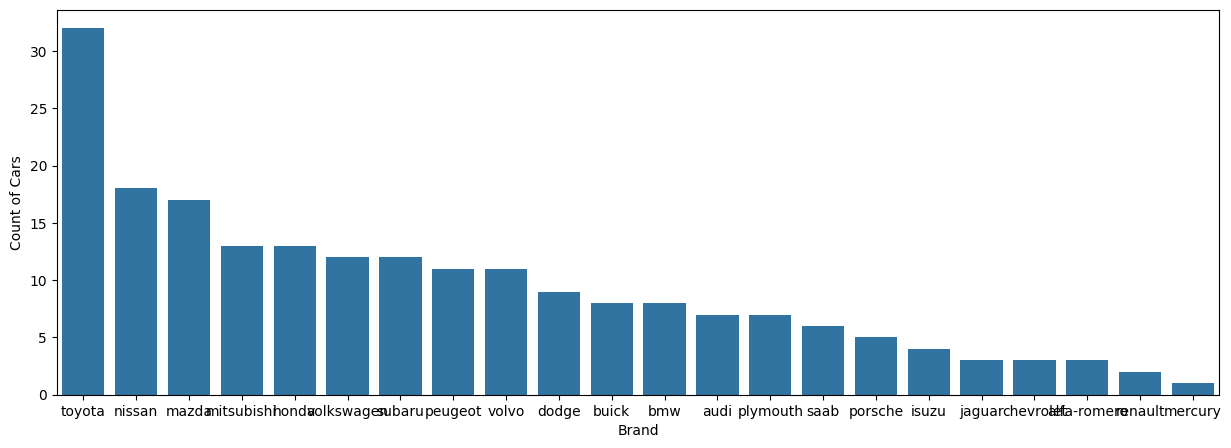

<Figure size 640x480 with 0 Axes>

In [13]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(x=data['Brand'], order=pd.value_counts(data['Brand']).index)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()

In [14]:
data.drop(['car_ID', 'symboling', 'CarName'],axis = 1, inplace = True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [16]:
data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [17]:
data['enginelocation'].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [18]:
data['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [19]:
data_comp_avg_price = data[['price', 'Brand']].groupby('Brand', as_index=False).mean().rename(columns={'price':'brand_avg_price'})

In [20]:
data_comp_avg_price

,Brand,brand_avg_price
0,alfa-romero,15498.333333
1,audi,17859.166714
2,bmw,26118.750000
3,buick,33647.000000
4,chevrolet,6007.000000
5,dodge,7875.444444
6,honda,8184.692308
7,isuzu,8916.500000
8,jaguar,34600.000000
9,mazda,10652.882353


In [21]:
data = data.merge(data_comp_avg_price, on='Brand')

In [22]:
data['brand_avg_price'].describe()

count      205.000000
mean     13276.710571
std       7154.179185
min       6007.000000
25%       9239.769231
50%      10077.500000
75%      15489.090909
max      34600.000000
Name: brand_avg_price, dtype: float64

In [23]:
data['brand_category'] = data['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

In [24]:
data.columns.tolist()

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price',
 'Brand',
 'brand_avg_price',
 'brand_category']

In [25]:
data = data[['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginetype',
 'cylindernumber',
 'enginesize',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'Brand',
 'brand_avg_price',
 'brand_category', 'price']]

In [26]:
data.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,Brand,brand_avg_price,brand_category,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,alfa-romero,15498.333333,Mid_Range,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,2.68,9.0,111,5000,21,27,alfa-romero,15498.333333,Mid_Range,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,3.47,9.0,154,5000,19,26,alfa-romero,15498.333333,Mid_Range,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,3.40,10.0,102,5500,24,30,audi,17859.166714,Mid_Range,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,3.40,8.0,115,5500,18,22,audi,17859.166714,Mid_Range,17450.0


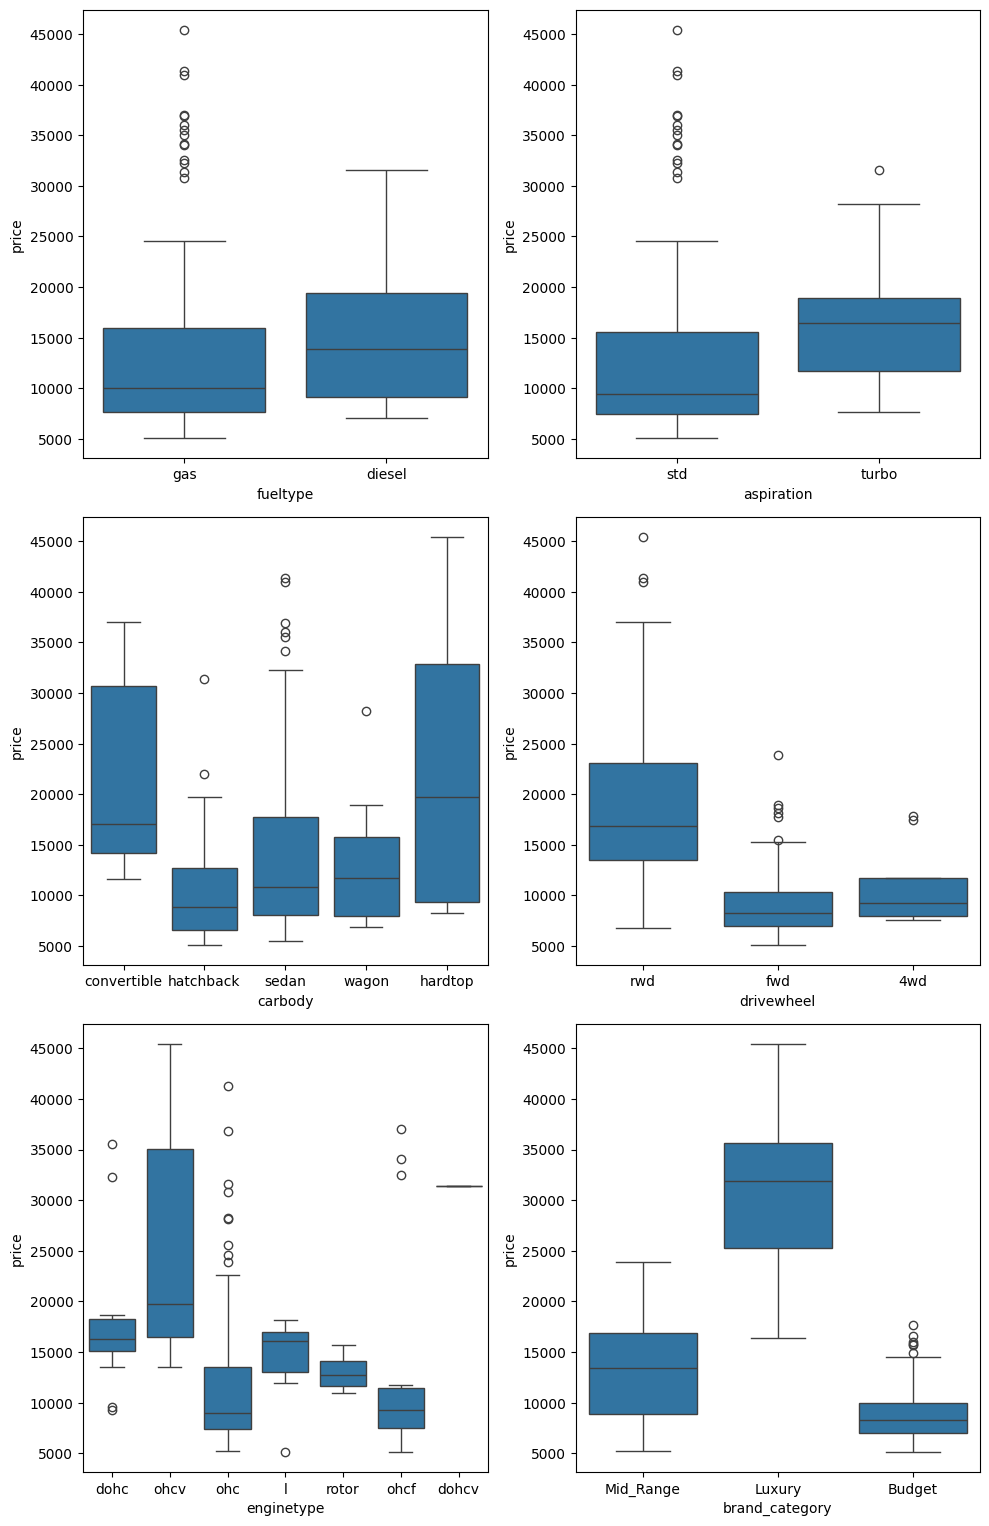

In [27]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = data)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = data)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = data)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = data)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = data)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = data)
plt.tight_layout()
plt.show()

In [28]:
numerical_col = data.select_dtypes(include=['float64', 'int64'])
numerical_col.corr()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,brand_avg_price,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.544494,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.609220,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.680698,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.186132,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.725252,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.760656,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.494625,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.009705,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.133186,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.648787,0.808139


In [29]:
corr_matrix = numerical_col.corr()
corr_matrix['price'].sort_values(ascending=False)

price               1.000000
brand_avg_price     0.895520
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

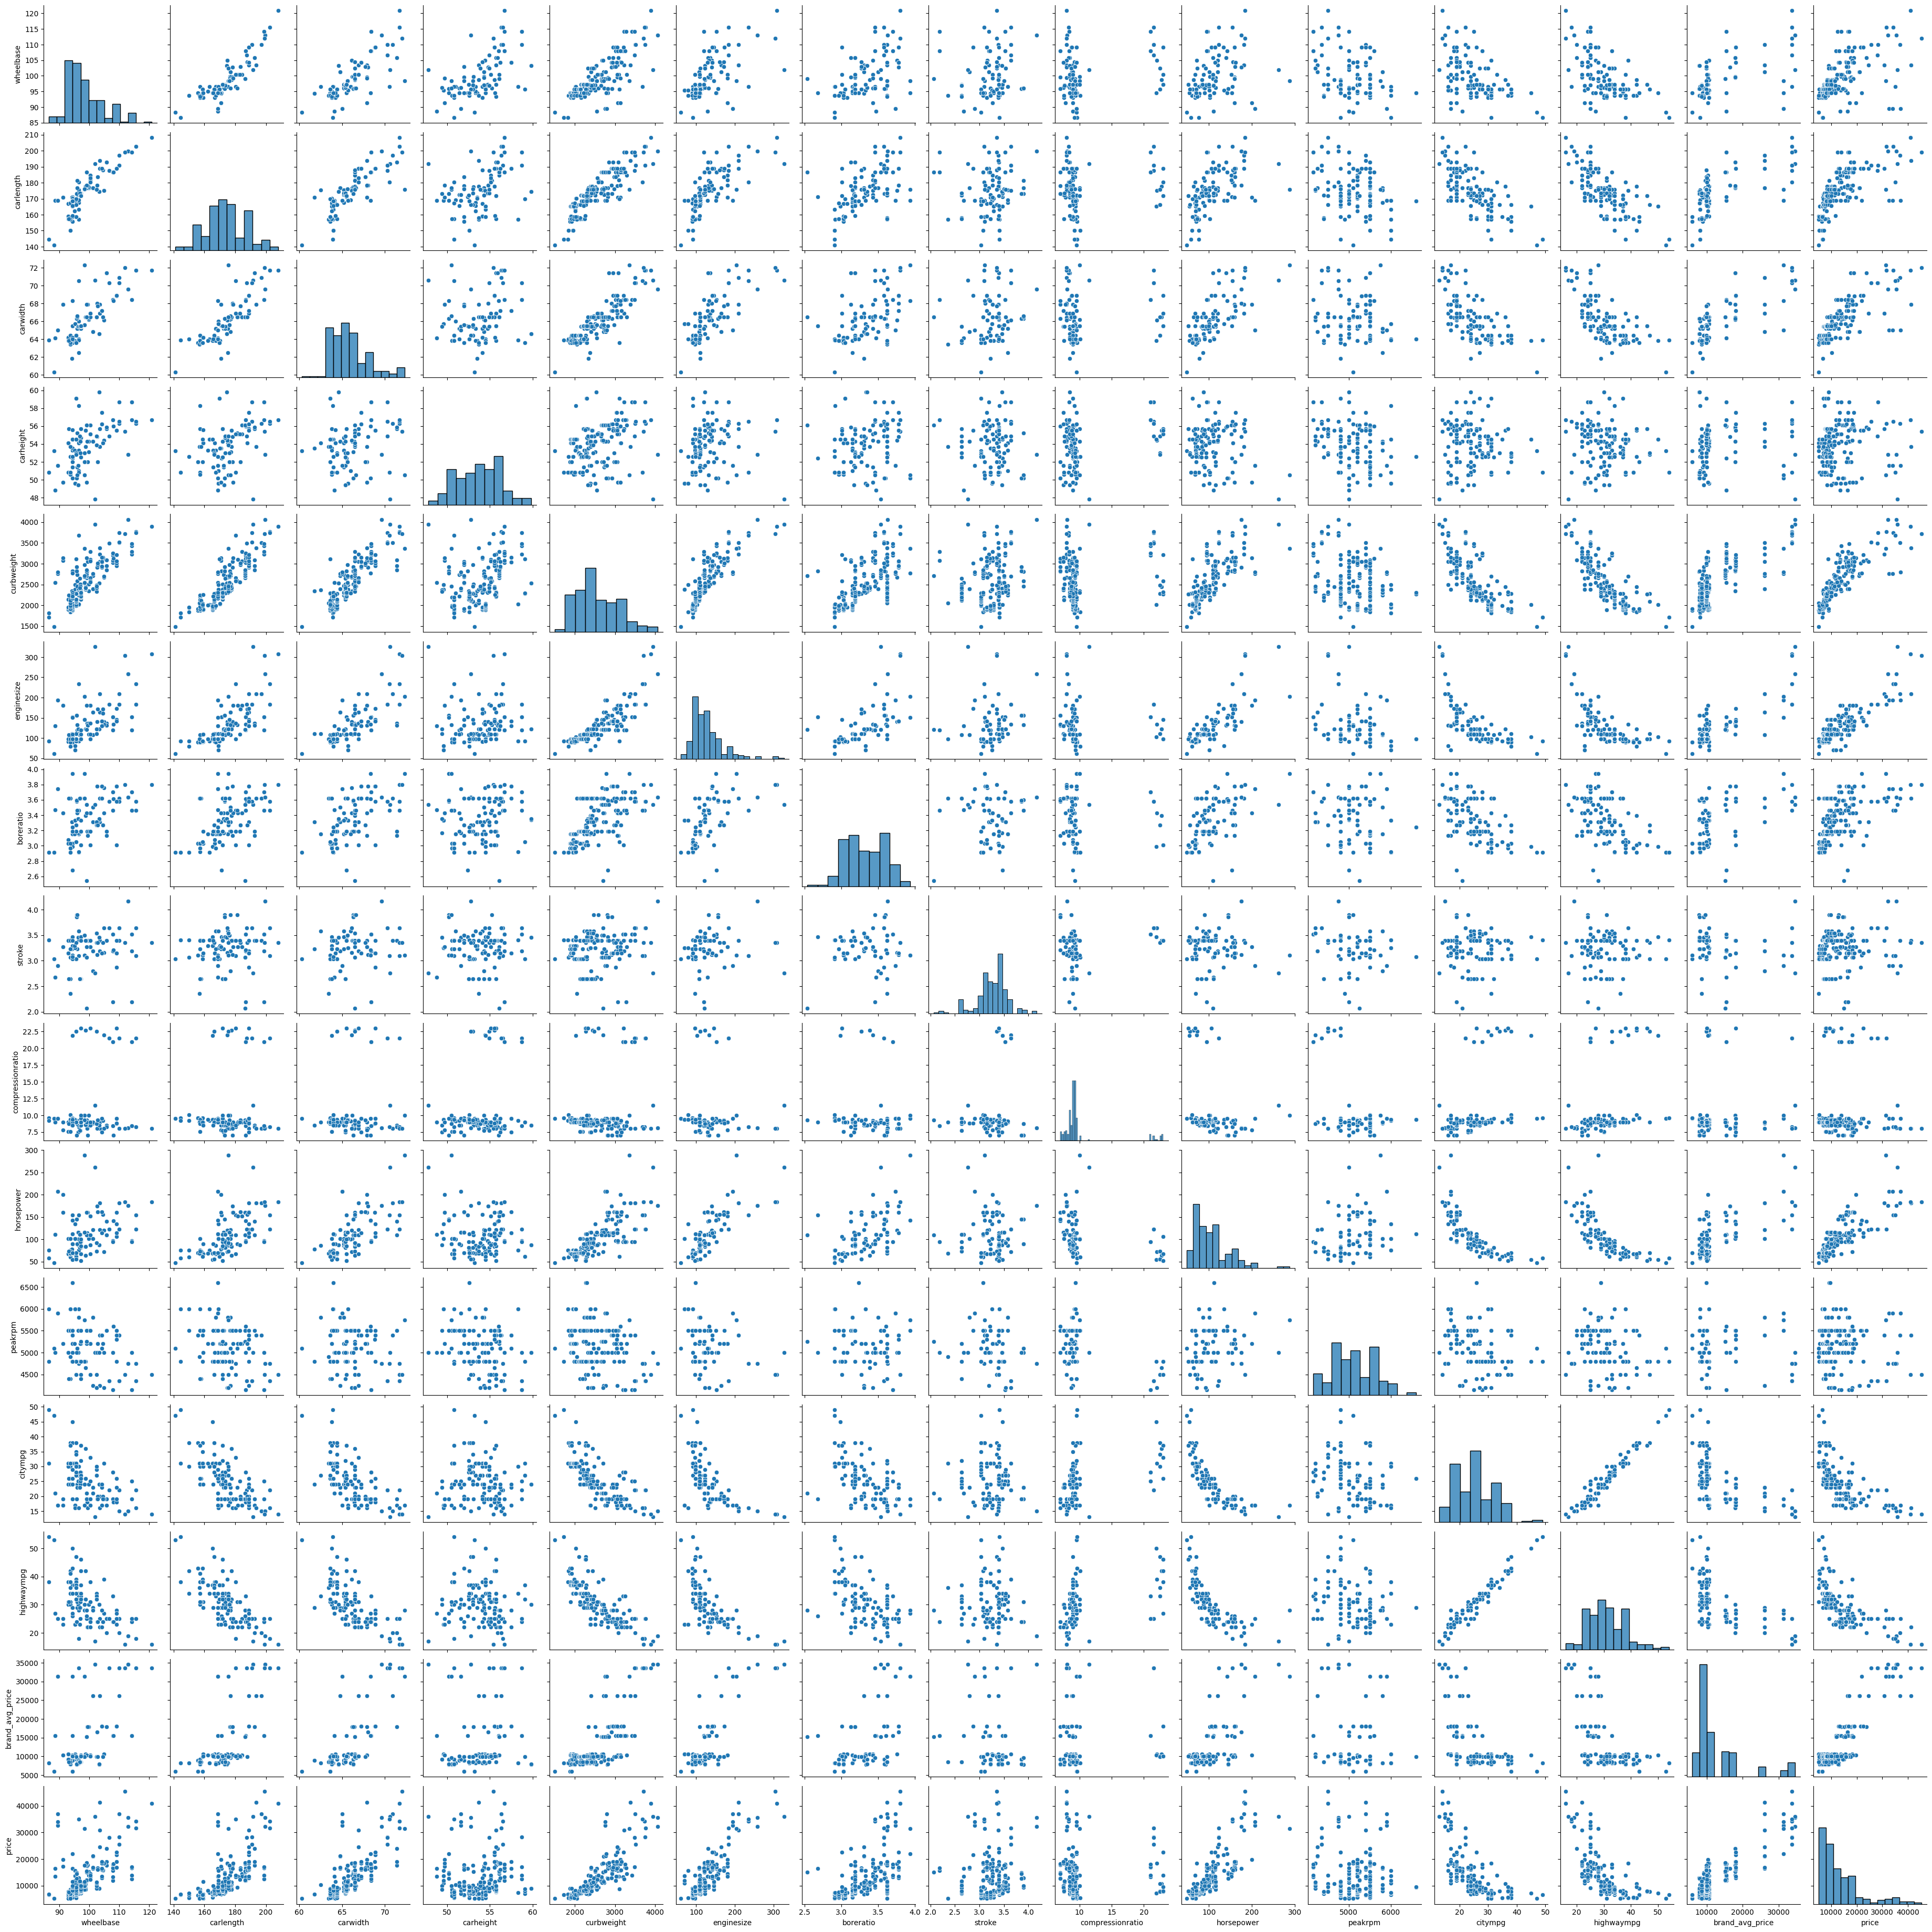

In [47]:
sns.pairplot(data)
plt.show()

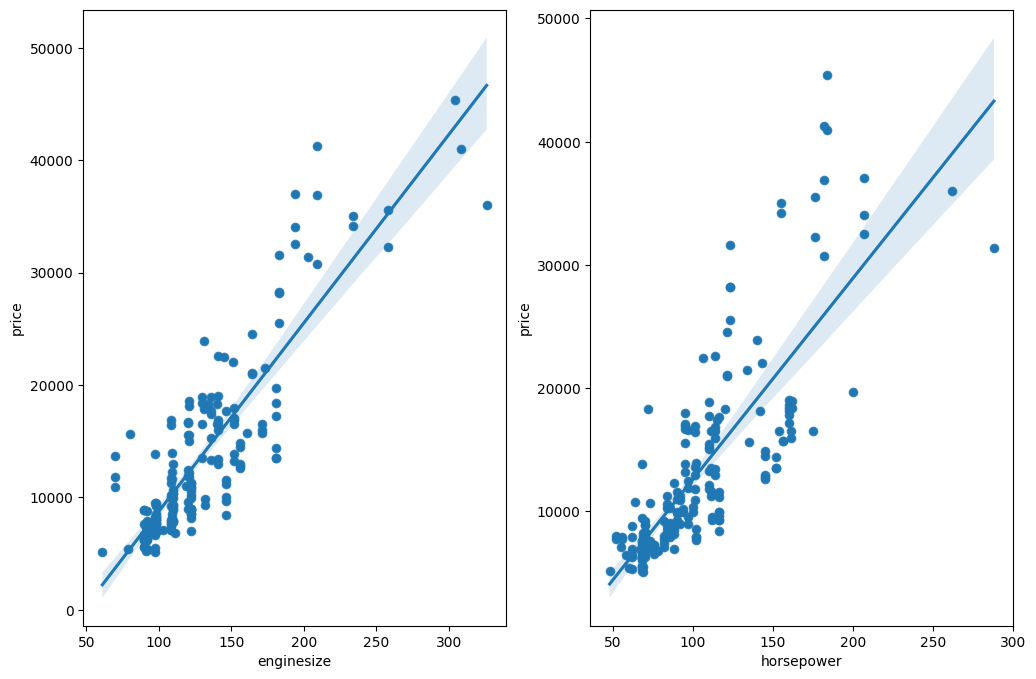

In [30]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 8), ncols=2, sharey=False)
sns.scatterplot(x=data['enginesize'], y=data['price'], ax=ax1)
sns.regplot(x=data['enginesize'], y=data['price'], ax=ax1)

sns.scatterplot(x=data['horsepower'], y=data['price'], ax=ax2)
sns.regplot(x=data['horsepower'], y=data['price'], ax=ax2)

plt.show()

In [31]:
numerical_col

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,brand_avg_price,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,15498.333333,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,15498.333333,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,15498.333333,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,17859.166714,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17859.166714,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,18063.181818,16845.0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,18063.181818,19045.0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,18063.181818,21485.0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,18063.181818,22470.0


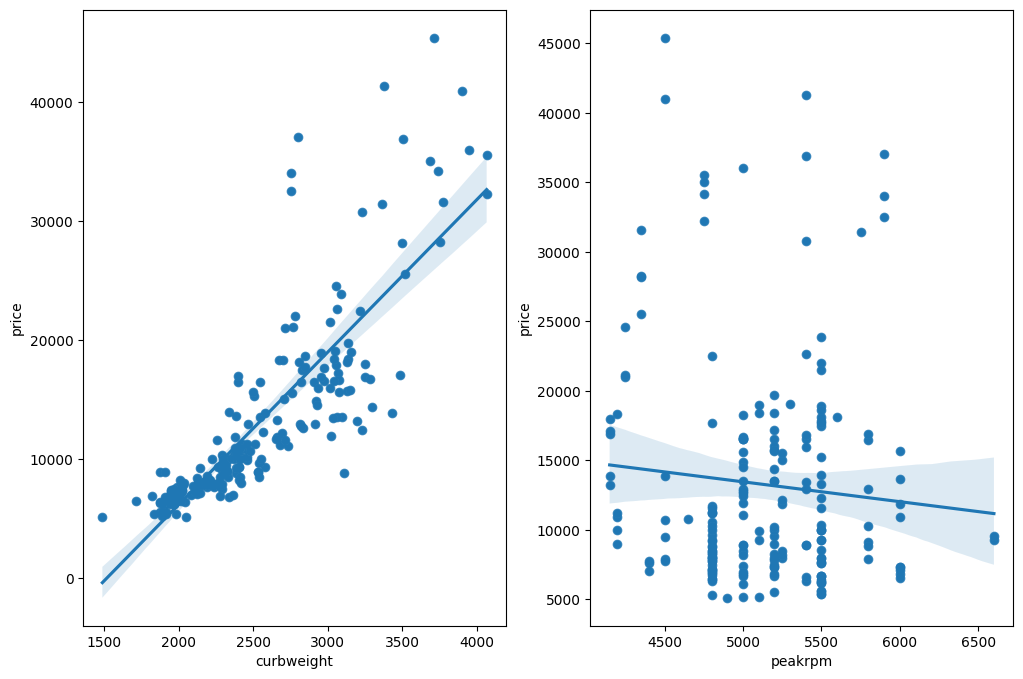

In [32]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 8), ncols=2, sharey=False)
sns.scatterplot(x=data['curbweight'], y=data['price'], ax=ax1)
sns.regplot(x=data['curbweight'], y=data['price'], ax=ax1)

sns.scatterplot(x=data['peakrpm'], y=data['price'], ax=ax2)
sns.regplot(x=data['peakrpm'], y=data['price'], ax=ax2)

plt.show()

<Axes: xlabel='enginesize', ylabel='price'>

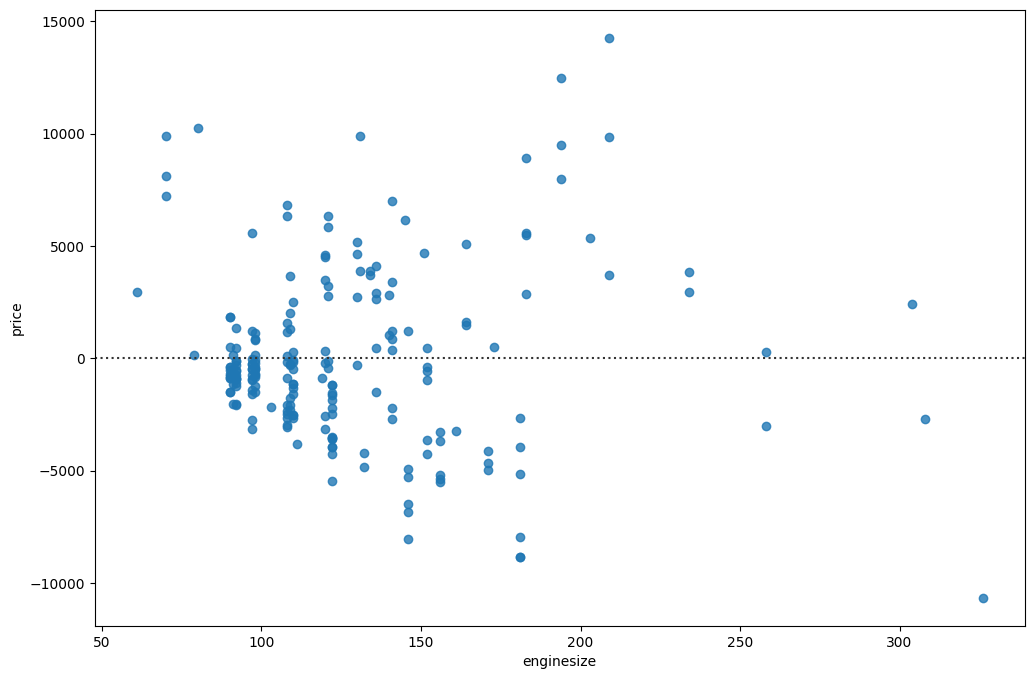

In [33]:
plt.subplots(figsize = (12,8))
sns.residplot(x=data["enginesize"], y=data["price"])

C:\Users\Muhammad Umer Khan\AppData\Local\Temp\ipykernel_11368\1448674767.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)


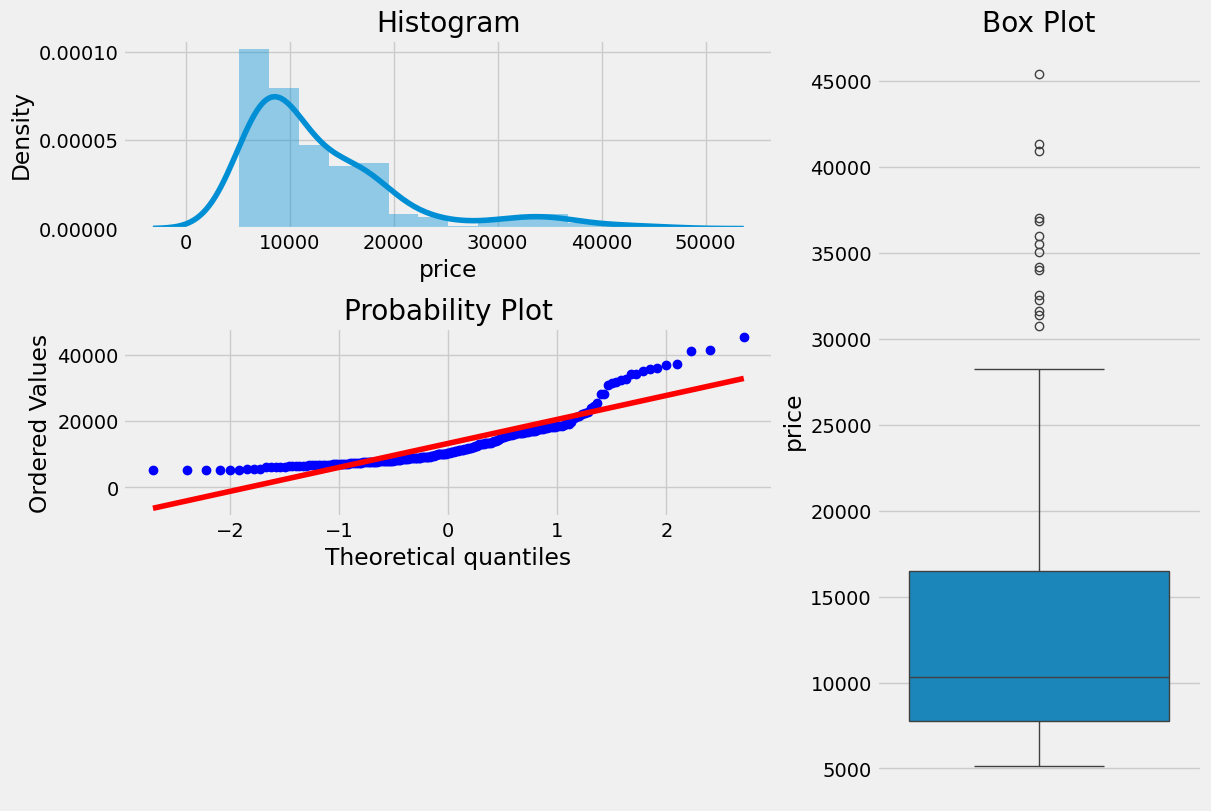

In [34]:
def plotting_3_chart(data, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(data.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(data.loc[:,feature], orient='v', ax = ax3);
    
plotting_3_chart(data, 'price')

These three charts above can tell us a lot about our target variable:

*   Our target variable, 'price' is not normally distributed
*   Our target variable is right-skewed
*   There are some outliers in the variable

The right-skewed plot means that most prices in the dataset are on the lower end (below 15,000). The 'max' value is very far from the '75%' quantile statistic. All these plots show that the assumption for accurate linear regression modeling is not met.

Next, we will perform the log transformation to correct our target variable and to make it more normally distributed.

But first, we will save our data that we have changed so far, in the 'previous_data' frame.


In [35]:
previous_data = data.copy()

In [36]:
normaltest(data['price'].values)

NormaltestResult(statistic=77.37514013383584, pvalue=1.578344501676757e-17)

C:\Users\Muhammad Umer Khan\AppData\Local\Temp\ipykernel_11368\1448674767.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)


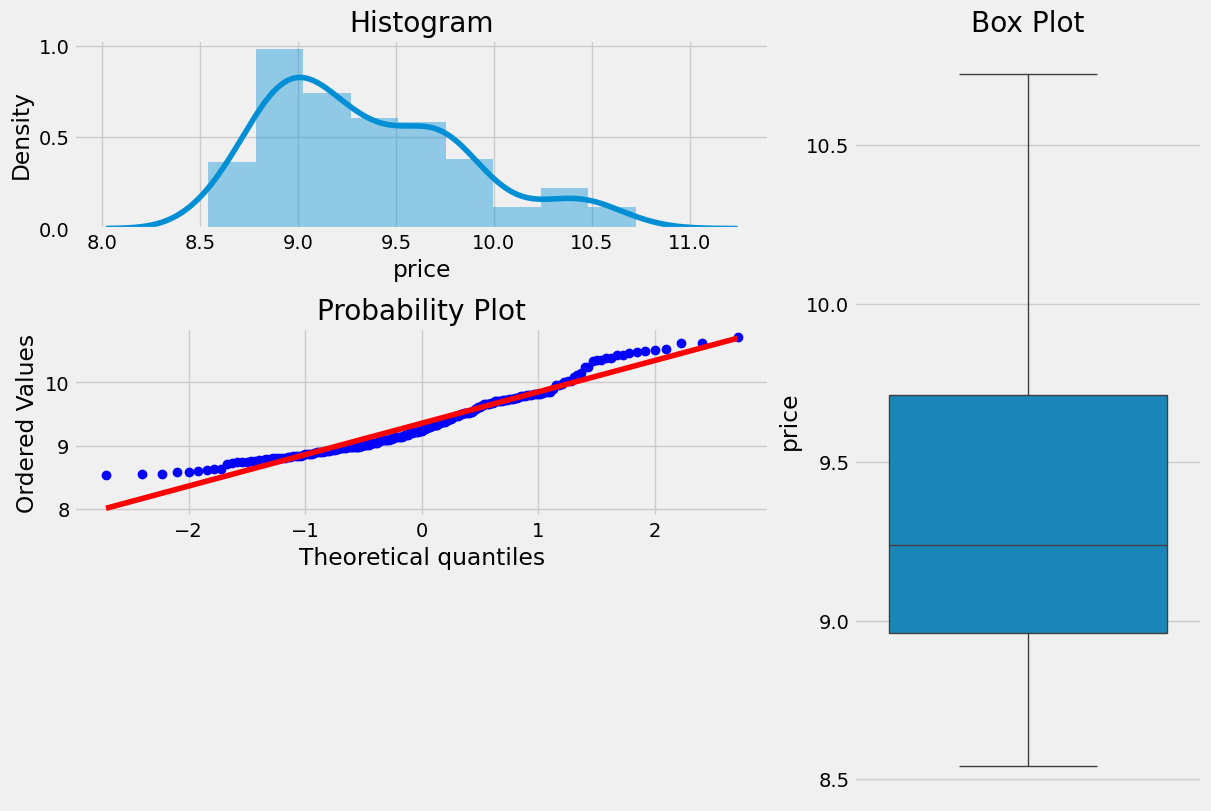

In [37]:
data['price'] = np.log(data['price'])
plotting_3_chart(data, 'price')

In [38]:
normaltest(data.price.values)

NormaltestResult(statistic=14.10341345775947, pvalue=0.0008659297880185564)

In [39]:
cp_result = boxcox(previous_data['price'])
boxcox_price = cp_result[0]
normaltest(boxcox_price)

NormaltestResult(statistic=16.727142456113345, pvalue=0.00023320999876491982)

### 4. *Multicollinearity*

*Multicollinearity* is when there is a strong correlation between the independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features. *Multicollinearity* can lead to a variety of problems, including:

*   The effect of predictor variables estimated by our regression will depend on what other variables are included in our model.
*   Predictors can have widely different results depending on the observations in our sample, and small changes in samples can   result in very different estimated effects.
*   With very high multicollinearity, the inverse matrix, the computer calculations may not be accurate.
*   We can no longer interpret a coefficient on a variable because there is no scenario in which one variable can change without a conditional change in another variable.

Using `heatmap()` function is an excellent way to identify whether there is *multicollinearity* present or not. The best way to solve for *multicollinearity* is to use the regularization methods like *Ridge* or *Lasso*, which we will introduce in the **Regularization** lab.


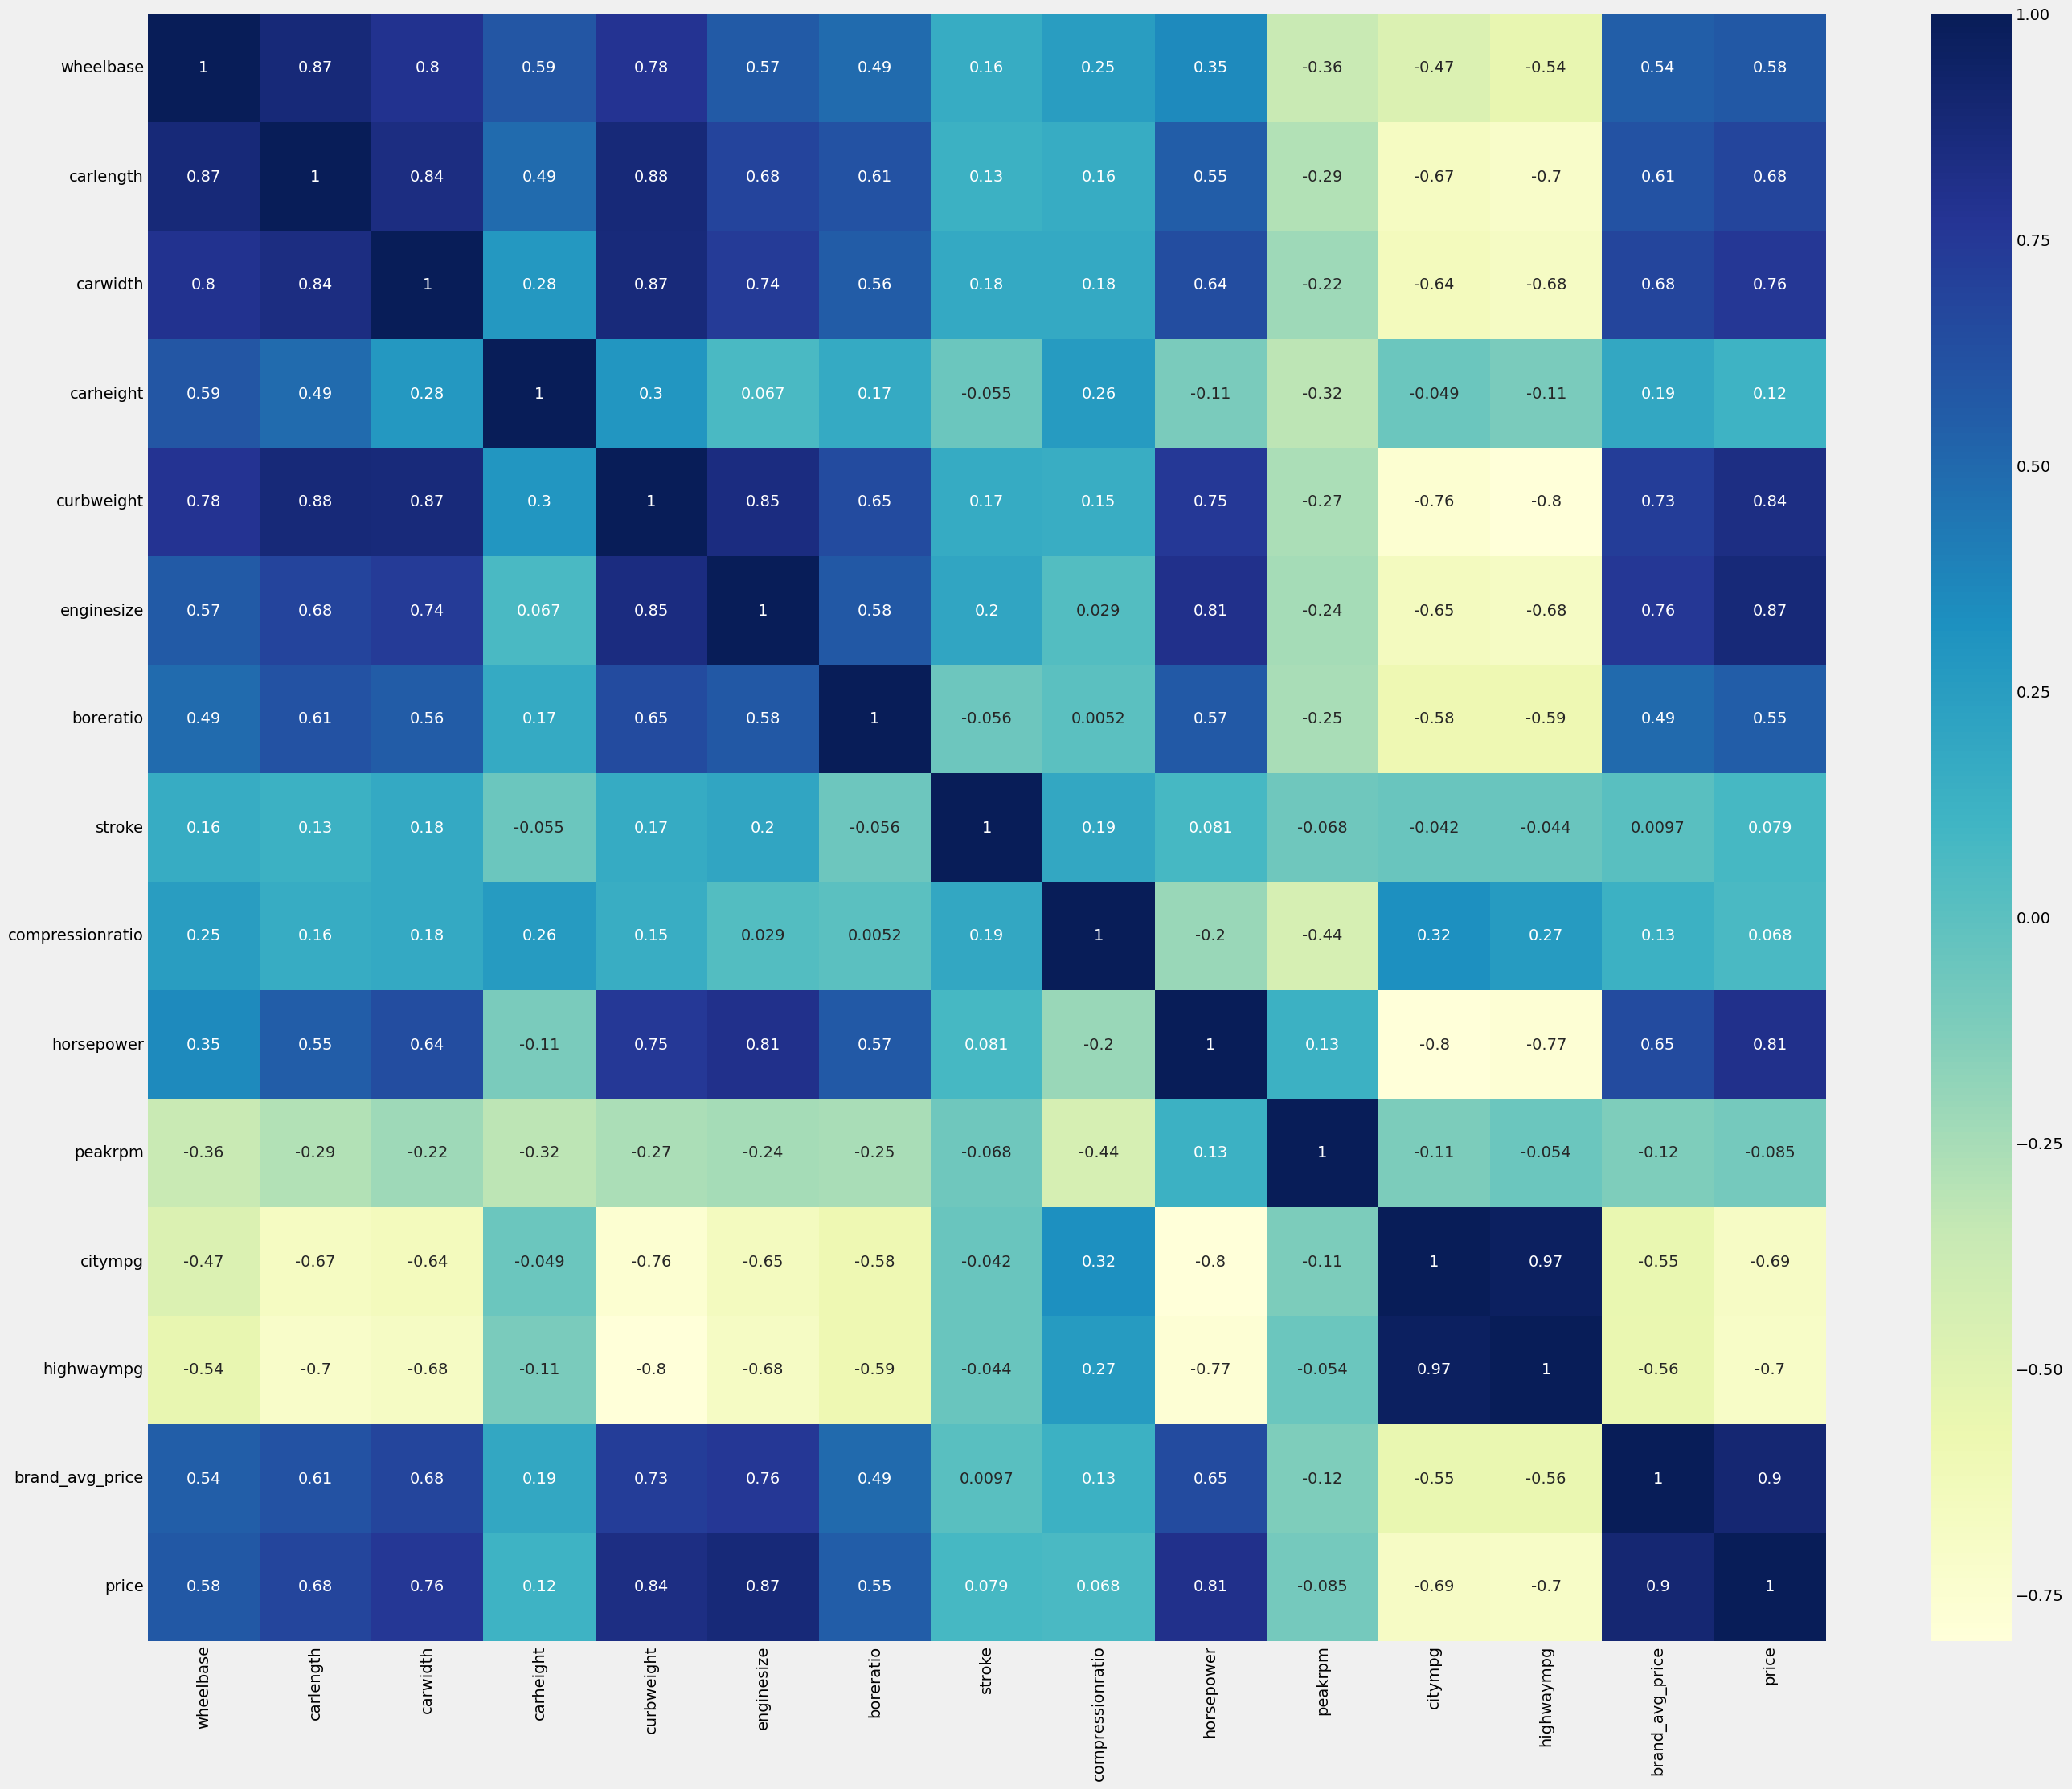

In [40]:
plt.figure(figsize = (30, 25)); sns.heatmap(numerical_col.corr(), annot = True, cmap="YlGnBu"); plt.show()

## **Linear Regression Model**

In [41]:
columns=['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase', 'brand_category',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth','citympg','highwaympg']



selected = data[columns]
selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           205 non-null    float64
 1   fueltype        205 non-null    object 
 2   aspiration      205 non-null    object 
 3   carbody         205 non-null    object 
 4   drivewheel      205 non-null    object 
 5   wheelbase       205 non-null    float64
 6   brand_category  205 non-null    object 
 7   curbweight      205 non-null    int64  
 8   enginetype      205 non-null    object 
 9   cylindernumber  205 non-null    object 
 10  enginesize      205 non-null    int64  
 11  boreratio       205 non-null    float64
 12  horsepower      205 non-null    int64  
 13  carlength       205 non-null    float64
 14  carwidth        205 non-null    float64
 15  citympg         205 non-null    int64  
 16  highwaympg      205 non-null    int64  
dtypes: float64(5), int64(5), object(7)


We can find the categorical columns by  iterating  through the `dtypes`  attribute.


In [42]:
categorical_columns = [key for key, value in selected.dtypes.items() if value == 'O']
categorical_columns

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'brand_category',
 'enginetype',
 'cylindernumber']

In [43]:
numerical_columns = [key for key, value in selected.dtypes.items() if value != 'O']
len(numerical_columns)

10

In [44]:
numeric_columns=list(set(columns)-set(categorical_columns))
len(numeric_columns)

10

In [45]:
X = selected.drop(columns='price', axis='columns')
y = selected['price'].copy()

In [46]:
for column in categorical_columns:
    print("Column name:", column); print("Value count: "); print(X[column].value_counts())

Column name: fueltype
Value count: 
fueltype
gas       185
diesel     20
Name: count, dtype: int64
Column name: aspiration
Value count: 
aspiration
std      168
turbo     37
Name: count, dtype: int64
Column name: carbody
Value count: 
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
Column name: drivewheel
Value count: 
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
Column name: brand_category
Value count: 
brand_category
Budget       95
Mid_Range    86
Luxury       24
Name: count, dtype: int64
Column name: enginetype
Value count: 
enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64
Column name: cylindernumber
Value count: 
cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64


In [47]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [48]:
one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), categorical_columns)], remainder='passthrough')
X = one_hot.fit_transform(X)
type(X)

numpy.ndarray

In [52]:
names=one_hot.get_feature_names_out()
names

array(['one_hot__fueltype_diesel', 'one_hot__fueltype_gas',
       'one_hot__aspiration_std', 'one_hot__aspiration_turbo',
       'one_hot__carbody_convertible', 'one_hot__carbody_hardtop',
       'one_hot__carbody_hatchback', 'one_hot__carbody_sedan',
       'one_hot__carbody_wagon', 'one_hot__drivewheel_4wd',
       'one_hot__drivewheel_fwd', 'one_hot__drivewheel_rwd',
       'one_hot__brand_category_Budget', 'one_hot__brand_category_Luxury',
       'one_hot__brand_category_Mid_Range', 'one_hot__enginetype_dohc',
       'one_hot__enginetype_dohcv', 'one_hot__enginetype_l',
       'one_hot__enginetype_ohc', 'one_hot__enginetype_ohcf',
       'one_hot__enginetype_ohcv', 'one_hot__enginetype_rotor',
       'one_hot__cylindernumber_eight', 'one_hot__cylindernumber_five',
       'one_hot__cylindernumber_four', 'one_hot__cylindernumber_six',
       'one_hot__cylindernumber_three', 'one_hot__cylindernumber_twelve',
       'one_hot__cylindernumber_two', 'remainder__wheelbase',
       'remain

In [53]:
colunm_names=[name[name.find("_")+1:] for name in  [name[name.find("__")+2:] for name in names]]
colunm_names

['diesel',
 'gas',
 'std',
 'turbo',
 'convertible',
 'hardtop',
 'hatchback',
 'sedan',
 'wagon',
 '4wd',
 'fwd',
 'rwd',
 'category_Budget',
 'category_Luxury',
 'category_Mid_Range',
 'dohc',
 'dohcv',
 'l',
 'ohc',
 'ohcf',
 'ohcv',
 'rotor',
 'eight',
 'five',
 'four',
 'six',
 'three',
 'twelve',
 'two',
 'wheelbase',
 'curbweight',
 'enginesize',
 'boreratio',
 'horsepower',
 'carlength',
 'carwidth',
 'citympg',
 'highwaympg']

In [54]:
df = pd.DataFrame(data=X, columns=colunm_names)

In [56]:
df.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,two,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0


In [57]:
# df.to_csv('cleaned_car_data.csv', index=False)

In [69]:
def dummies(x,data):
    temp = pd.get_dummies(data[x], drop_first = True)
    data = pd.concat([data, temp], axis = 1)
    data.drop([x], axis = 1, inplace = True)
    return data


X_ = selected[categorical_columns+numeric_columns]
N_column=0


for column in  categorical_columns:
    print(pd.unique(data[column]))


X_ = dummies(column,X_)

['gas' 'diesel']
['std' 'turbo']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['Mid_Range' 'Luxury' 'Budget']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [71]:
X_

,fueltype,aspiration,carbody,drivewheel,brand_category,enginetype,carwidth,citympg,wheelbase,carlength,...,horsepower,curbweight,boreratio,highwaympg,five,four,six,three,twelve,two
0,gas,std,convertible,rwd,Mid_Range,dohc,64.1,21,88.6,168.8,...,111,2548,3.47,27,False,True,False,False,False,False
1,gas,std,convertible,rwd,Mid_Range,dohc,64.1,21,88.6,168.8,...,111,2548,3.47,27,False,True,False,False,False,False
2,gas,std,hatchback,rwd,Mid_Range,ohcv,65.5,19,94.5,171.2,...,154,2823,2.68,26,False,False,True,False,False,False
3,gas,std,sedan,fwd,Mid_Range,ohc,66.2,24,99.8,176.6,...,102,2337,3.19,30,False,True,False,False,False,False
4,gas,std,sedan,4wd,Mid_Range,ohc,66.4,18,99.4,176.6,...,115,2824,3.19,22,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,Mid_Range,ohc,68.9,23,109.1,188.8,...,114,2952,3.78,28,False,True,False,False,False,False
201,gas,turbo,sedan,rwd,Mid_Range,ohc,68.8,19,109.1,188.8,...,160,3049,3.78,25,False,True,False,False,False,False
202,gas,std,sedan,rwd,Mid_Range,ohcv,68.9,18,109.1,188.8,...,134,3012,3.58,23,False,False,True,False,False,False
203,diesel,turbo,sedan,rwd,Mid_Range,ohc,68.9,26,109.1,188.8,...,106,3217,3.01,27,False,False,True,False,False,False


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.30, random_state=0)

In [74]:
s = StandardScaler()
X_train = s.fit_transform(X_train)

In [75]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [76]:
X_test = s.fit_transform(X_test)
car_price_predictions = lm.predict(X_test)
car_price_predictions

array([ 4.94294304e+11, -1.29808325e+12, -8.60281804e+11, -7.89832912e+12,
       -3.69921301e+11, -1.65237332e+12,  4.04403541e+11, -2.34514389e+12,
        2.29544727e+12,  4.04403541e+11,  3.68852282e+12,  2.03758463e+13,
        4.47544197e+10, -2.09145224e+11, -4.59812064e+11,  5.65179618e+11,
       -8.49992350e+11, -1.25046209e+12,  4.04403541e+11,  4.04403541e+11,
        4.04403541e+11, -1.75199586e+12,  4.04403541e+11,  5.65179618e+11,
       -4.36873583e+10, -3.99228434e+11, -4.59812064e+11, -2.14217614e+12,
        4.04403541e+11, -3.69921301e+11, -3.69921301e+11, -7.60101588e+11,
        3.61875477e+12, -4.59812064e+11, -3.69921301e+11,  3.68852282e+12,
       -5.31977783e+12, -1.04855633e+12,  4.04403541e+11, -3.17547622e+11,
       -4.59812064e+11, -2.35543334e+12,  1.03578971e+12,  4.94294304e+11,
       -2.75859558e+12, -4.59812064e+11, -4.59812064e+11,  4.04403541e+11,
       -3.14877586e+12, -3.69921301e+11, -8.60281804e+11, -3.69921301e+11,
       -2.99035987e+11,  

In [77]:
mse = mean_squared_error(y_test, car_price_predictions)
mse

9.868803310888792e+24

In [78]:
lm.score(X_test, y_test)

-3.835063162852469e+25

In [79]:
from sklearn.metrics import r2_score 
r2_score(y_test,car_price_predictions)

-3.835063162852469e+25

In [80]:
steps=[('scaler', StandardScaler()), ('lm',  LinearRegression())]

In [81]:
pipe = Pipeline(steps=steps)
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

In [82]:
car_price_predictions = pipe.predict(X_test)
mse = mean_squared_error(y_test, car_price_predictions)
rmse = np.sqrt(mse)
rmse


0.18510755249827654

In [83]:
r2_score(car_price_predictions, y_test)

0.8568891732579043

In [88]:
X = selected[categorical_columns+numeric_columns]
one_hot = ColumnTransformer(transformers=[("one_hot", OneHotEncoder(), categorical_columns) ],remainder="passthrough")
steps=[('one_hot',one_hot), ('scaler', StandardScaler()), ('lm',  LinearRegression())]

pipe = Pipeline(steps=steps)
pipe.fit(X,y)
car_price_predictions=pipe.predict(X)
r2_score(car_price_predictions, y)

1.0